<a href="https://colab.research.google.com/github/farihast/be5210_finalproject/blob/main/BE5210_NeuraLitt_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages and Datasets

In [2]:
#Set up the notebook environment
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.stats import pearsonr
from scipy import signal as sig
import scipy

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
with open('/content/drive/MyDrive/BE5210_FinalProject/leaderboard_data.mat', 'rb') as g:
  leaderboard_data = scipy.io.loadmat('/content/drive/MyDrive/BE5210_FinalProject/leaderboard_data.mat')
leaderboard_ecog = leaderboard_data['leaderboard_ecog']

In [5]:
with open('/content/drive/MyDrive/BE5210_FinalProject/raw_training_data.mat', 'rb') as g:
  raw_training_data = scipy.io.loadmat('/content/drive/MyDrive/BE5210_FinalProject/raw_training_data.mat')
train_dg = raw_training_data['train_dg']
train_ecog = raw_training_data['train_ecog']

In [6]:
print(leaderboard_data.keys())
print(raw_training_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'leaderboard_ecog'])
dict_keys(['__header__', '__version__', '__globals__', 'train_dg', 'train_ecog'])


In [7]:
print(leaderboard_data['__globals__'], leaderboard_data['__version__'], leaderboard_data['__header__'])
print(raw_training_data['__globals__'], raw_training_data['__version__'], raw_training_data['__header__'])

[] 1.0 b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Apr  9 21:34:40 2020'
[] 1.0 b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Apr 10 12:52:24 2020'


In [8]:
print(leaderboard_ecog.shape, train_dg.shape, train_ecog.shape)

(3, 1) (3, 1) (3, 1)


In [17]:
leaderboard_ecog[0][0].shape

(147500, 62)

In [14]:
train_dg[0][0].shape

(300000, 5)

In [15]:
train_ecog[0][0].shape

(300000, 62)

In [19]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(train_ecog[0][0], train_dg[0][0], test_size=0.30, shuffle = False)
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_ecog[1][0], train_dg[1][0], test_size=0.30, shuffle = False)
X_train3, X_test3, y_train3, y_test3 = train_test_split(train_ecog[2][0], train_dg[2][0], test_size=0.30, shuffle = False)

#Filter Data

In [20]:
def filter_data(raw_eeg, fs=1000):
  """
  Write a filter function to clean underlying data.
  Filter type and parameters are up to you. Points will be awarded for reasonable filter type, parameters and application.
  Please note there are many acceptable answers, but make sure you aren't throwing out crucial data or adversly
  distorting the underlying data!

  Input: 
    raw_eeg (samples x channels): the raw signal
    fs: the sampling rate (1000 for this dataset)
  Output: 
    clean_data (samples x channels): the filtered signal
  """
  
  filter = sig.firwin(50, [1,400], pass_zero =False, fs=fs)
  # b = np.ones(len(filter))
  filt = sig.filtfilt(filter, [1], raw_eeg, axis = 0)

  return filt

In [21]:
filt_sig = filter_data(X_train1)
print(filt_sig.shape)

(210000, 62)


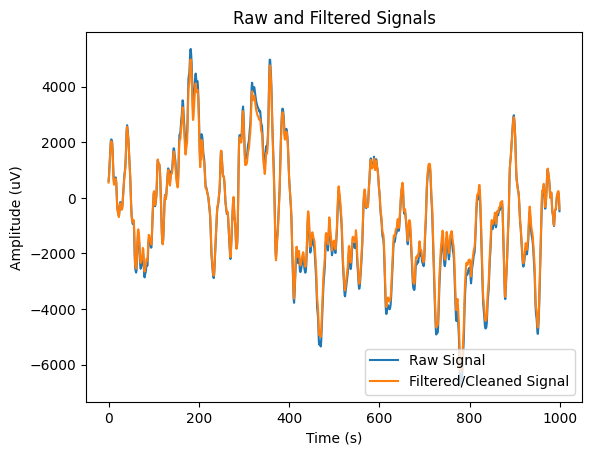

In [22]:
filt_sig = filter_data(X_train1[:,0])
plt.plot(X_train1[:1000,0], label='Raw Signal')
plt.plot(filt_sig[:1000], label='Filtered/Cleaned Signal')
plt.legend(loc="lower right")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title("Raw and Filtered Signals")
plt.show()

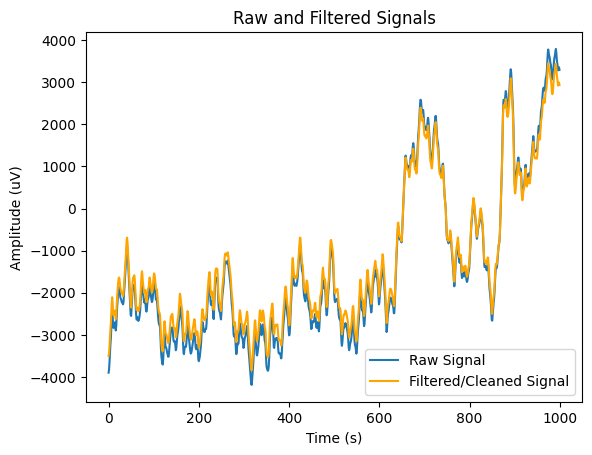

In [23]:
filt_sig = filter_data(X_train2[:,0])
plt.plot(X_train2[:1000,0], label='Raw Signal')
plt.plot(filt_sig[:1000], color='orange', label='Filtered/Cleaned Signal')
plt.legend(loc="lower right")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title("Raw and Filtered Signals")
plt.show()

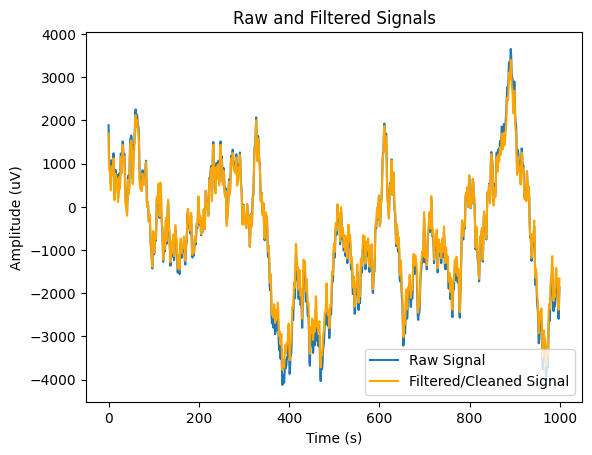

In [24]:
filt_sig = filter_data(X_train3[:,0])
plt.plot(X_train3[:1000,0], label='Raw Signal')
plt.plot(filt_sig[:1000], color='orange', label='Filtered/Cleaned Signal')
plt.legend(loc="lower right")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title("Raw and Filtered Signals")
plt.show()

#Windows

In [25]:
def NumWins(fs, winLen, winDisp, x):
  xLen = len(x)
  winLen_vals = winLen * fs
  winDisp_vals =winDisp * fs
  return int((xLen - winLen_vals) / winDisp_vals ) +1
s
def MovingWinFeats(x, fs, winLen, winDisp, featFn):
  xLen = len(x)
  #NumWins(fs, winLen, winDisp, x)
  numWins = NumWins(fs, winLen, winDisp, x)
  result = []
  wd_fs = winDisp*fs
  wl_fs = winLen*fs
  for i in range(numWins):
    finish = (xLen - 1) - wd_fs *i 
    start = finish - wl_fs
    win = x[int(start):int(finish)]
    result.append(featFn(win))
  result.reverse()
  return result

In [28]:
wins = NumWins(1000, .100, .050, train_ecog[0][0])
print(wins)

5999
